## Regression tasks
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

## classification tasks
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
whole_data = load_breast_cancer()

In [ ]:
X_data = whole_data.data
y_data = whole_data.target

In [ ]:
np.unique(y_data)

array([0, 1])

In [ ]:
np.bincount(y_data)

array([212, 357])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 100)

### Dataset Description
- Breast cancer dataset has total 569 data instances (212 malign, 357 benign instances)
- 30 attributes (features) to predict the binary class (M/B)
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [ ]:
print(X_train[0])

[1.305e+01 1.931e+01 8.261e+01 5.272e+02 8.060e-02 3.789e-02 6.920e-04
 4.167e-03 1.819e-01 5.501e-02 4.040e-01 1.214e+00 2.595e+00 3.296e+01
 7.491e-03 8.593e-03 6.920e-04 4.167e-03 2.190e-02 2.990e-03 1.423e+01
 2.225e+01 9.024e+01 6.241e+02 1.021e-01 6.191e-02 1.845e-03 1.111e-02
 2.439e-01 6.289e-02]


In [ ]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 100)

### 1. Creating a model
- Same with regression model at the outset

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [ ]:
model = Sequential()

### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added
- Doc: https://keras.io/layers/core/

In [ ]:
model.add(Dense(16, input_shape = (30,), activation='relu'))    # Input layer => input_shape should be explicitly designated
model.add(Dense(32, activation='relu'))                         # Hidden layer => only output dimension should be designated
model.add(Dense(16, activation='relu'))                        # Hidden layer => only output dimension should be designated
model.add(Dense(1, activation='sigmoid'))                       # Output layer => output dimension = 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,585
Trainable params: 1,585
Non-trainable params: 0
_________________________________________________________________


### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
adam = optimizers.Adam(0.001)    # stochastic gradient descent optimizer

In [ ]:
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [ ]:
import os
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir)
log_dir = os.path.join('lab2-logs', 'model-1')

# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」max則代表監測數據越大越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.keras',
                                        monitor='val_binary_accuracy',
                                        save_best_only=True,
                                        mode='max')
es = keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', mode='max', patience=10)

### 2. Training
- Training the model with training data provided

In [ ]:
history = model.fit(X_train, y_train,  # 傳入訓練數據
               batch_size=32,  # 批次大小設為32
               epochs=100,  # 整個dataset訓練100遍
               validation_data=(X_val, y_val,),  # 驗證數據
               callbacks=[model_mckp, es])  # Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/100
11/11 [==============================] - 9s 51ms/step - loss: 0.5666 - binary_accuracy: 0.8534 - val_loss: 0.5206 - val_binary_accuracy: 0.8772
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 0.4437 - binary_accuracy: 0.9238 - val_loss: 0.4244 - val_binary_accuracy: 0.8860
Epoch 3/100
11/11 [==============================] - 0s 19ms/step - loss: 0.3383 - binary_accuracy: 0.9296 - val_loss: 0.3488 - val_binary_accuracy: 0.8947
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 0.2574 - binary_accuracy: 0.9355 - val_loss: 0.2994 - val_binary_accuracy: 0.8947
Epoch 5/100
11/11 [==============================] - 0s 18ms/step - loss: 0.1987 - binary_accuracy: 0.9501 - val_loss: 0.2699 - val_binary_accuracy: 0.9035
Epoch 6/100
11/11 [==============================] - 0s 24ms/step - loss: 0.1598 - binary_accuracy: 0.9560 - val_loss: 0.2486 - val_binary_accuracy: 0.9035
Epoch 7/100
11/11 [==============================] - 0s 25ms/ste

### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [ ]:
model = keras.models.load_model('lab2-logs/models/Best-model-1.keras')

In [ ]:
results = model.evaluate(X_test, y_test) # no transformation needed

4/4 [==============================] - 0s 7ms/step - loss: 0.1392 - binary_accuracy: 0.9561


In [ ]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'binary_accuracy']
[0.13918550312519073, 0.9561403393745422]


In [ ]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.13918550312519073
accuracy:  0.9561403393745422


二分類的指標函數 binary accuracy = (TN + TP)/ALL

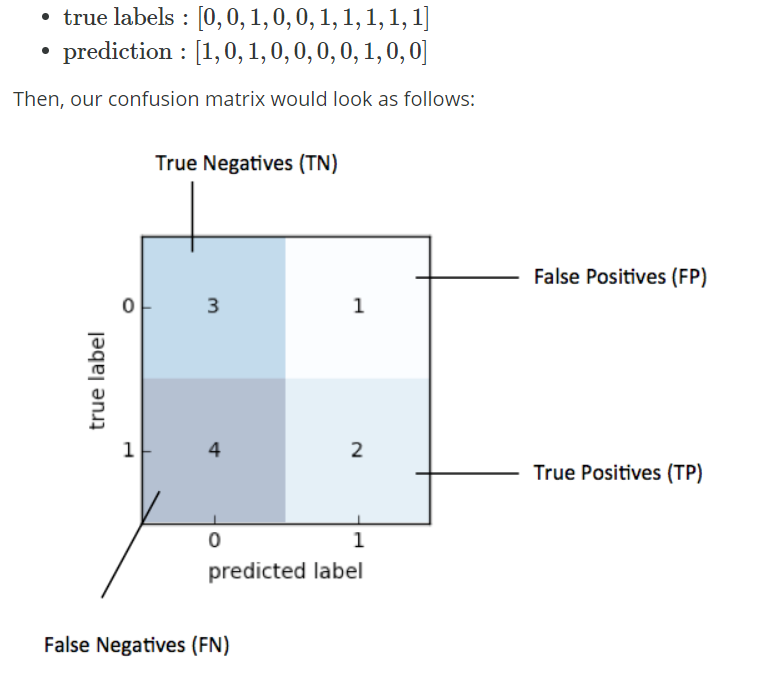

In [ ]:
# true label: 900 cats, 100 dogs; predicted label: 1000 cats, 0 dogs; acc=?